In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
list_of_path_windows = [
    './docs/Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_утверждении_Мет.txt',
    './docs/Приказ_Минтруда_России_от_27_11_2020_N_833н_Об_утверждении.txt',
    './docs/Трудовой_кодекс_Российской_Федерации_от_30_12_2001_N_197_ФЗ_1.txt',
    './docs/Федеральный_закон_от_27_12_2002_N_184_ФЗ_ред_от_02_07_2021.txt',
    './docs/Правила_расследования_причин_аварий_в_электроэнергетике.txt',
    './docs/Инструкция_«О_мерах_пожарной_безопасности_при_проведении_огневых.txt',
    './docs/РД_34_09_105_96_Методические_указания_по_организации_учета_топлива.txt',
    './docs/РД_153_34_0_20_522_99_Типовая_инструкция_по_периодическому_техническому.txt',
    './docs/Федеральный_закон_Российской_Федерации_от_27_июля_2006_г_.txt'
]

In [4]:
def read_file(path, encoding, is_lower=False):
    list_of_paragraph = []
    buffer = []
    with open(path, encoding=encoding) as file:
        regex = re.compile(
            r'(((?<!Статья )(?<!^)(?<!(\.|\s))(?<!     )[а-яА-Я\d]{2,})([\.]{0,1}[\]\)\"]{0,2}[\.\;\:]{1}(\s|$)))',
            flags=re.IGNORECASE)
        text = file.read()

        if is_lower:
            text = text.lower()
        offset = 0
        buf = ''
        for ind, value in enumerate(regex.split(text, maxsplit=0)):
            if ind == 0 + offset:
                buf = value
            if ind == 1 + offset:
                list_of_paragraph.append((buf + value).strip())
                offset += 6

        second_regex = re.compile(r'([^\dгст][\.\;\:](?=\s|$))', flags=re.IGNORECASE)

        for value1 in list_of_paragraph:
            buf = ''
            for value in second_regex.split(value1, maxsplit=0):
                if value == '':
                    continue

                if len(value) > 2 and buf != '':
                    buffer.append(buf.strip())
                    buf = value
                elif len(value) > 2:
                    buf = value
                elif len(value) <= 2:
                    buffer.append((buf + value).strip())
                    buf = ''
    return buffer

In [5]:
list_of_docs = []
list_of_docs_lower = []

for path_to_doc in list_of_path_windows:
    buf_list = read_file(path_to_doc, 'windows-1251')
    buf_list = [x for x in buf_list if len(x) > 3]
    list_of_docs.append(buf_list)

for path_to_doc in list_of_path_windows:
    buf_list = read_file(path_to_doc, 'windows-1251', True)
    buf_list = [x for x in buf_list if len(x) > 3]
    list_of_docs_lower.append(buf_list)

list_of_docs

[['Приказ Минсельхоза РФ от 31.01.2003 N 26\n"Об утверждении Методических рекомендаций по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях"\nДокумент предоставлен КонсультантПлюс\n\nwww.consultant.ru\n\nДата сохранения:',
  '14.12.2022\n\xa0\n\n\nМИНИСТЕРСТВО СЕЛЬСКОГО ХОЗЯЙСТВА РОССИЙСКОЙ ФЕДЕРАЦИИ\n\nПРИКАЗ\nот 31 января 2003 г. N 26\n\nОБ УТВЕРЖДЕНИИ МЕТОДИЧЕСКИХ РЕКОМЕНДАЦИЙ\nПО БУХГАЛТЕРСКОМУ УЧЕТУ МАТЕРИАЛЬНО-ПРОИЗВОДСТВЕННЫХ\nЗАПАСОВ В СЕЛЬСКОХОЗЯЙСТВЕННЫХ ОРГАНИЗАЦИЯХ\n\n     Во исполнение Программы реформирования бухгалтерского учета в соответствии с международными стандартами финансовой отчетности и в целях разъяснения особенностей по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях приказываю:',
  '1. Утвердить "Методические рекомендации по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях" (далее - Методические рекомендации) согласно Приложен

In [6]:
list_of_docs_lower[0][5]

'антонца.'

In [7]:
list_of_docs_lower[0]

['приказ минсельхоза рф от 31.01.2003 n 26\n"об утверждении методических рекомендаций по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях"\nдокумент предоставлен консультантплюс\n\nwww.consultant.ru\n\nдата сохранения:',
 '14.12.2022\n\xa0\n\n\nминистерство сельского хозяйства российской федерации\n\nприказ\nот 31 января 2003 г. n 26\n\nоб утверждении методических рекомендаций\nпо бухгалтерскому учету материально-производственных\nзапасов в сельскохозяйственных организациях\n\n     во исполнение программы реформирования бухгалтерского учета в соответствии с международными стандартами финансовой отчетности и в целях разъяснения особенностей по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях приказываю:',
 '1. утвердить "методические рекомендации по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях" (далее - методические рекомендации) согласно приложению.

In [8]:
list_of_paragraph = []
list_of_paragraph_lower = []
with open('./ДИ.txt', encoding='utf-8') as file:
    regex = re.compile('(((?<!Статья )(?<!^)(?<!\.)[а-яА-Я\d]{2,})([\.]{0,1}[\]\)\"]{0,2}[\.\;\:]{1}(\s|$)))',
                       re.IGNORECASE)
    second_regex = re.compile(r'([^\dгст][\.\;\:](?=\s|$))', flags=re.IGNORECASE)
    text = file.read()

    offset = 0
    buf = ''
    buffer = []
    for ind, value in enumerate(regex.split(text)):
        if ind == 0 + offset:
            buf = value
        if ind == 1 + offset:
            list_of_paragraph.append((buf + value).strip())
            offset += 5

    for value1 in list_of_paragraph:
        buf = ''
        for value in second_regex.split(value1, maxsplit=0):
            if value == '':
                continue

            if len(value) > 2 and buf != '':
                buffer.append(buf.strip())
                buf = value
            elif len(value) > 2:
                buf = value
            elif len(value) <= 2:
                buffer.append((buf + value).strip())
                buf = ''
    list_of_paragraph = buffer.copy()

with open('./ДИ.txt', encoding='utf-8') as file:
    regex = re.compile('(((?<!Статья )(?<!^)(?<!\.)[а-яА-Я\d]{2,})([\.]{0,1}[\]\)\"]{0,2}[\.\;\:]{1}(\s|$)))',
                       re.IGNORECASE)
    second_regex = re.compile(r'([^\dгст][\.\;\:](?=\s|$))', flags=re.IGNORECASE)
    text = file.read().lower()

    offset = 0
    buf = ''
    buffer = []
    for ind, value in enumerate(regex.split(text)):
        if ind == 0 + offset:
            buf = value
        if ind == 1 + offset:
            list_of_paragraph_lower.append((buf + value).strip())
            offset += 5

    for value1 in list_of_paragraph_lower:
        buf = ''
        for value in second_regex.split(value1, maxsplit=0):
            if value == '':
                continue

            if len(value) > 2 and buf != '':
                buffer.append(buf.strip())
                buf = value
            elif len(value) > 2:
                buf = value
            elif len(value) <= 2:
                buffer.append((buf + value).strip())
                buf = ''
    list_of_paragraph_lower = buffer.copy()

list_of_paragraph_lower[0:5]

['должностная инструкция № i - 29 начальника смены топливно – транспортного цеха\n1. общие положения\n1.1. настоящая должностная инструкция определяет функциональные обязанности, права и ответственность начальника смены ттц (далее нс ттц).',
 '1.2. инструкцию обязаны знать:',
 '- начальник ттц;',
 '- начальник смены электростанции (нсс);',
 '- заместитель начальника ттц;']

In [9]:
import torch

torch.cuda.is_available()

True

In [10]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('nq-distilbert-base-v1', device='cuda')

main_text = model.encode(list_of_paragraph)
main_text

array([[-0.20499702, -0.5064496 , -0.02001632, ..., -0.0068349 ,
         0.8712208 , -0.5240382 ],
       [ 0.5633357 , -0.6172214 ,  0.25649178, ...,  0.40052342,
         0.70886874, -0.8324484 ],
       [ 0.53675234, -0.60646087,  0.10743655, ...,  0.28237346,
         0.27558386,  0.00969482],
       ...,
       [ 0.6236731 , -0.43956196,  0.66593874, ...,  0.09090111,
         0.5918828 , -0.78433484],
       [ 0.3258507 , -0.5823654 ,  0.02325773, ..., -0.00437805,
         0.72240585, -0.5823145 ],
       [ 0.06989661, -0.6246722 ,  0.6552321 , ...,  0.18589352,
         0.81747645, -0.5803422 ]], dtype=float32)

In [11]:
main_text_lower = model.encode(list_of_paragraph)
main_text_lower

array([[-0.20499702, -0.5064496 , -0.02001632, ..., -0.0068349 ,
         0.8712208 , -0.5240382 ],
       [ 0.5633357 , -0.6172214 ,  0.25649178, ...,  0.40052342,
         0.70886874, -0.8324484 ],
       [ 0.53675234, -0.60646087,  0.10743655, ...,  0.28237346,
         0.27558386,  0.00969482],
       ...,
       [ 0.6236731 , -0.43956196,  0.66593874, ...,  0.09090111,
         0.5918828 , -0.78433484],
       [ 0.3258507 , -0.5823654 ,  0.02325773, ..., -0.00437805,
         0.72240585, -0.5823145 ],
       [ 0.06989661, -0.6246722 ,  0.6552321 , ...,  0.18589352,
         0.81747645, -0.5803422 ]], dtype=float32)

In [173]:
import tensorflow_hub as hub
import tensorflow_text as text

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [174]:
%%time
main_text = embed(list_of_paragraph)
main_text

CPU times: total: 2.11 s
Wall time: 2.08 s


<tf.Tensor: shape=(344, 512), dtype=float32, numpy=
array([[ 0.06852619,  0.00918718,  0.02223262, ..., -0.01231342,
         0.08158375, -0.05502979],
       [-0.01308657, -0.02440512, -0.00095032, ...,  0.02746731,
        -0.04516132, -0.0297647 ],
       [-0.0082967 ,  0.06312819,  0.03731924, ..., -0.04874755,
         0.08101592,  0.02421275],
       ...,
       [ 0.01642066,  0.028883  ,  0.05071934, ...,  0.02768172,
        -0.03563578, -0.00663365],
       [ 0.03835735,  0.04628762, -0.01081865, ..., -0.02103151,
         0.01203288,  0.00878887],
       [ 0.10876199,  0.06338903,  0.04416167, ..., -0.00075075,
         0.01629758, -0.05523175]], dtype=float32)>

In [175]:
%%time
main_text_lower = embed(list_of_paragraph)
main_text_lower

CPU times: total: 234 ms
Wall time: 222 ms


<tf.Tensor: shape=(344, 512), dtype=float32, numpy=
array([[ 0.06852619,  0.00918718,  0.02223262, ..., -0.01231342,
         0.08158375, -0.05502979],
       [-0.01308657, -0.02440512, -0.00095032, ...,  0.02746731,
        -0.04516132, -0.0297647 ],
       [-0.0082967 ,  0.06312819,  0.03731924, ..., -0.04874755,
         0.08101592,  0.02421275],
       ...,
       [ 0.01642066,  0.028883  ,  0.05071934, ...,  0.02768172,
        -0.03563578, -0.00663365],
       [ 0.03835735,  0.04628762, -0.01081865, ..., -0.02103151,
         0.01203288,  0.00878887],
       [ 0.10876199,  0.06338903,  0.04416167, ..., -0.00075075,
         0.01629758, -0.05523175]], dtype=float32)>

In [14]:
%%time
list_of_embeddings = []
list_of_embeddings_lower = []
BATCH_SIZE = 64

for doc in list_of_docs:
    buffer = np.empty((0, 768), float)
    for i in range(0, len(doc), BATCH_SIZE):
        batch = doc[i:i + BATCH_SIZE]
        # buffer = np.concatenate((buffer, embed(batch)), axis=0)
        buffer = np.concatenate((buffer, model.encode(batch)), axis=0)

    list_of_embeddings.append(buffer)

for doc in list_of_docs_lower:
    buffer = np.empty((0, 768), float)
    for i in range(0, len(doc), BATCH_SIZE):
        batch = doc[i:i + BATCH_SIZE]
        # buffer = np.concatenate((buffer, embed(batch)), axis=0)
        buffer = np.concatenate((buffer, model.encode(batch)), axis=0)
    list_of_embeddings_lower.append(buffer)

CPU times: total: 1min 59s
Wall time: 1min 51s


In [34]:
for index, doc in enumerate(list_of_embeddings_lower):
    list_of_embeddings_lower[index] = list_of_embeddings_lower[index].astype(np.float32)
    print(list_of_embeddings_lower[index].dtype)

float32
float32
float32
float32
float32
float32
float32
float32
float32


In [181]:
# %%time
# Old embed
# list_of_embeddings = []
# list_of_embeddings_lower = []
# for doc in list_of_docs:
#     buffer = []
#     for par in doc:
#         try:
#             buffer.append(embed(par))
#         except Exception as e:
#             print(par[:100])
#             print(e.with_traceback())
#     list_of_embeddings.append(buffer)
#
# for doc in list_of_docs_lower:
#     buffer = []
#     for par in doc:
#         try:
#             buffer.append(embed(par))
#         except Exception as e:
#             print(par[:100])
#             print(e.with_traceback())
#     list_of_embeddings_lower.append(buffer)

In [35]:
inner_array = []
final_array_lower = []
for emb in list_of_embeddings_lower:
    # inner_array.append(np.inner(main_text_lower, emb))
    inner_array.append(util.cos_sim(main_text_lower, emb))
    inner_array.append([])

for ind, arr in enumerate(inner_array):
    if len(arr) > 0:
        final_array_lower.append(pd.DataFrame(data=arr.reshape(arr.shape[0], arr.shape[1])[:, :]))
    else:
        s = pd.Series([None])
        final_array_lower.append(pd.DataFrame(s))

final_array_lower

[         0         1         2         3         4         5         6     \
 0    0.653044  0.829664  0.895557  0.899168  0.836655  0.572801  0.826865   
 1    0.524814  0.658385  0.809761  0.789919  0.820649  0.658031  0.650416   
 2    0.478844  0.605306  0.720412  0.691775  0.720041  0.819780  0.603752   
 3    0.514659  0.585500  0.704035  0.662244  0.634747  0.666873  0.576603   
 4    0.559983  0.687083  0.808238  0.790202  0.801248  0.743630  0.673118   
 ..        ...       ...       ...       ...       ...       ...       ...   
 339  0.652469  0.719942  0.841021  0.832760  0.805648  0.588791  0.692069   
 340  0.613468  0.741032  0.862281  0.834349  0.830751  0.610173  0.723497   
 341  0.616250  0.732147  0.811112  0.812068  0.752494  0.545028  0.703657   
 342  0.693715  0.854439  0.933508  0.941101  0.837909  0.593996  0.842743   
 343  0.672088  0.828188  0.884885  0.883508  0.754603  0.542024  0.805804   
 
          7         8         9     ...      2712      2713   

In [36]:
inner_array = []
final_array = []
for emb in list_of_embeddings:
    inner_array.append(np.inner(main_text, emb))
    inner_array.append([])

for ind, arr in enumerate(inner_array):
    if len(arr) > 0:
        final_array.append(pd.DataFrame(data=arr.reshape(arr.shape[0], arr.shape[1])[:, :]))
    else:
        s = pd.Series([None])
        final_array.append(pd.DataFrame(s))
final_array

[           0           1           2           3           4           5     \
 0    145.365444  181.949854  203.592041  199.550672  189.473637  122.381851   
 1    114.870860  141.976251  181.013478  172.377717  182.745075  138.243795   
 2    102.881156  128.129058  158.078152  148.183598  157.392080  169.057143   
 3    113.044084  126.702812  157.932616  145.024146  141.844711  140.593772   
 4    124.894303  150.976077  184.101000  175.711165  181.810326  159.191291   
 ..          ...         ...         ...         ...         ...         ...   
 339  146.070747  158.793212  192.291156  185.873171  183.498530  126.519998   
 340  137.803686  163.997425  197.818610  186.857376  189.855632  131.557790   
 341  137.092591  160.467058  184.283686  180.112001  170.311292  116.377948   
 342  157.649454  191.303468  216.659815  213.226345  193.727535  129.565353   
 343  149.564503  181.577373  201.112035  196.022675  170.845844  115.775161   
 
            6           7           8 

In [37]:
df = pd.DataFrame(final_array[0])
df_lower = pd.DataFrame(final_array_lower[0])
df

,0,1,2,3,4,5,6,7,8,9,...,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721
0,145.365444,181.949854,203.592041,199.550672,189.473637,122.381851,182.693434,190.696548,196.670920,201.634066,...,162.540166,188.049996,148.160956,188.049996,148.160956,188.049996,148.160956,188.049996,148.160956,188.049996
1,114.870860,141.976251,181.013478,172.377717,182.745075,138.243795,141.307734,161.570606,160.279520,161.707699,...,127.643024,172.916078,115.456756,172.916078,115.456756,172.916078,115.456756,172.916078,115.456756,172.916078
2,102.881156,128.129058,158.078152,148.183598,157.392080,169.057143,128.756808,140.863388,134.909846,146.404099,...,99.139906,156.617770,93.482464,156.617770,93.482464,156.617770,93.482464,156.617770,93.482464,156.617770
3,113.044084,126.702812,157.932616,145.024146,141.844711,140.593772,125.711659,142.567944,138.075324,147.456732,...,110.515990,158.997059,105.468381,158.997059,105.468381,158.997059,105.468381,158.997059,105.468381,158.997059
4,124.894303,150.976077,184.101000,175.711165,181.810326,159.191291,149.014609,168.072793,165.359679,174.021408,...,128.840705,179.251533,121.584149,179.251533,121.584149,179.251533,121.584149,179.251533,121.584149,179.251533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,146.070747,158.793212,192.291156,185.873171,183.498530,126.519998,153.788159,178.813916,190.049860,181.182378,...,169.037493,191.422121,153.976301,191.422121,153.976301,191.422121,153.976301,191.422121,153.976301,191.422121
340,137.803686,163.997425,197.818610,186.857376,189.855632,131.557790,161.315290,180.125770,183.573991,183.950278,...,156.500536,193.147490,143.573183,193.147490,143.573183,193.147490,143.573183,193.147490,143.573183,193.147490
341,137.092591,160.467058,184.283686,180.112001,170.311292,116.377948,155.377301,172.301374,193.172689,183.603105,...,168.345601,193.252723,149.108819,193.252723,149.108819,193.252723,149.108819,193.252723,149.108819,193.252723
342,157.649454,191.303468,216.659815,213.226345,193.727535,129.565353,190.097380,206.684134,219.049399,216.673184,...,172.873114,206.461585,158.314877,206.461585,158.314877,206.461585,158.314877,206.461585,158.314877,206.461585


In [38]:
for arr in final_array[1:]:
    df = df.append(arr, ignore_index=True)

for arr in final_array_lower[1:]:
    df_lower = df_lower.append(arr, ignore_index=True)

C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\3258689176.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(arr, ignore_index=True)
C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\3258689176.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lower = df_lower.append(arr, ignore_index=True)


In [39]:
df

,0,1,2,3,4,5,6,7,8,9,...,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375
0,145.365444,181.949854,203.592041,199.550672,189.473637,122.381851,182.693434,190.696548,196.670920,201.634066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114.870860,141.976251,181.013478,172.377717,182.745075,138.243795,141.307734,161.570606,160.279520,161.707699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102.881156,128.129058,158.078152,148.183598,157.392080,169.057143,128.756808,140.863388,134.909846,146.404099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113.044084,126.702812,157.932616,145.024146,141.844711,140.593772,125.711659,142.567944,138.075324,147.456732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,124.894303,150.976077,184.101000,175.711165,181.810326,159.191291,149.014609,168.072793,165.359679,174.021408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,174.307749,186.461720,185.126109,176.835094,197.426039,187.809490,180.417841,180.912768,188.667594,190.484024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101,173.802842,171.959596,178.945087,195.315640,193.027966,195.421805,182.032697,172.187159,181.051441,179.193105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,202.593279,197.737760,188.680349,183.743781,218.529586,205.551105,188.198148,200.225340,210.162641,208.197967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,190.140633,183.219798,170.822768,173.844355,199.308929,188.953320,174.995443,187.072713,191.966435,188.311513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_lower

,0,1,2,3,4,5,6,7,8,9,...,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375
0,0.653044,0.829664,0.895557,0.899168,0.836655,0.572801,0.826865,0.862054,0.873754,0.894997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.524814,0.658385,0.809761,0.789919,0.820649,0.658031,0.650416,0.742793,0.724171,0.729965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.478844,0.605306,0.720412,0.691775,0.720041,0.819780,0.603752,0.659730,0.620968,0.673268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.514659,0.585500,0.704035,0.662244,0.634747,0.666873,0.576603,0.653136,0.621663,0.663304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.559983,0.687083,0.808238,0.790202,0.801248,0.743630,0.673118,0.758297,0.733212,0.770923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,0.783072,0.831586,0.832999,0.796139,0.855310,0.831920,0.796245,0.799429,0.845205,0.845744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101,0.788413,0.774383,0.813034,0.887911,0.844406,0.874076,0.811201,0.768287,0.818991,0.803366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,0.899638,0.871696,0.839192,0.817694,0.935809,0.899998,0.820995,0.874557,0.930633,0.913723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,0.862237,0.824815,0.775871,0.790038,0.871591,0.844861,0.779580,0.834427,0.868074,0.843964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

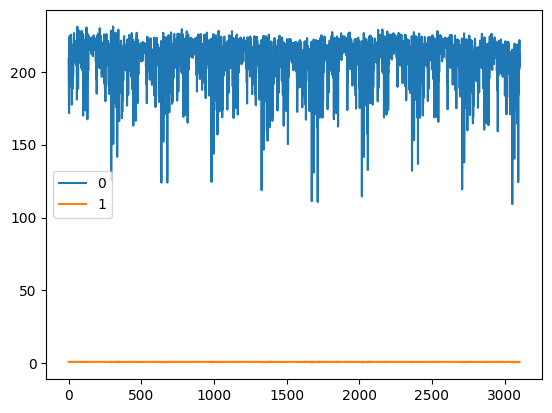

In [41]:
concat_df = pd.concat([df.max(axis=1), df_lower.max(axis=1)], axis=1)
concat_df.plot()

In [42]:
concat_df[0].mean()

209.67742782660633

In [43]:
concat_df[0].median()

214.54848261715753

In [44]:
concat_df[1].mean()

0.9244532

In [45]:
concat_df[1].median()

0.94034547

In [46]:
concat_df = pd.concat([df_lower.idxmax(axis=1), df_lower.max(axis=1)], axis=1)
concat_df = concat_df.rename(columns={0: "ID", 1: "Value"})
concat_df
# concat_df = pd.concat([df.idxmax(axis=1), df.max(axis=1)], axis=1)
# concat_df = concat_df.rename(columns={0: "ID", 1: "Value"})
# concat_df

,ID,Value
0,2410.0,0.921354
1,2638.0,0.860565
2,679.0,0.878365
3,2004.0,0.789516
4,693.0,0.889000
...,...,...
3100,80.0,0.930976
3101,24.0,0.906008
3102,113.0,0.968335
3103,140.0,0.907448


In [52]:
new_df = pd.DataFrame(columns=['main_file_id', 'first_text', 'second_text', 'first_path', 'second_path'])
i = 0
j = 0

is_first_row = True
for index, row in concat_df.iterrows():
    if np.isnan(row['ID']):
        i += 2
        j += 1
        if j != len(list_of_path_windows):
            new_df.loc[len(new_df)] = [None, None, None, None, None]
        continue
    try:
        new_df = new_df.append(
            {
                'main_file_id': (index - i) - ((len(list_of_paragraph_lower) - 1)*j),
                'first_text': list_of_paragraph_lower[(index - i) - ((len(list_of_paragraph_lower) - 1)*j)],
                'second_text': list_of_docs_lower[j][int(row['ID'])],
                'first_path': 'ДД.txt',
                'second_path': list_of_path_windows[j].split('/')[-1]
            },
            ignore_index=True)
    except Exception as e:
        print((index - i) - ((len(list_of_paragraph_lower) - 1)*j))
        print(index)

final_df = pd.concat([concat_df, new_df], axis=1)
final_df

C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\244327157.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\244327157.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\244327157.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\244327157.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_14052\244327157.py:14: FutureWarning: The frame.appe

,ID,Value,main_file_id,first_text,second_text,first_path,second_path
0,2410.0,0.921354,0,должностная инструкция № i - 29 начальника сме...,"для учета наличия, движения и обобщения данных...",ДД.txt,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
1,2638.0,0.860565,1,1.2. инструкцию обязаны знать:,1. в пункте 9 расчета показана последовательно...,ДД.txt,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
2,679.0,0.878365,2,- начальник ттц;,назначение мпз;,ДД.txt,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
3,2004.0,0.789516,3,- начальник смены электростанции (нсс);,номенклатурные номера (если они имеются);,ДД.txt,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
4,693.0,0.889000,4,- заместитель начальника ттц;,при смене материально ответственных лиц;,ДД.txt,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
...,...,...,...,...,...,...,...
3100,80.0,0.930976,340,9. положение о топливно-транспортном цехе.,9. порядок доступа к персональным данным гражд...,ДД.txt,Федеральный_закон_Российской_Федерации_от_27_и...
3101,24.0,0.906008,341,настоящая должностная инструкция.,6) достоверность информации и своевременность ...,ДД.txt,Федеральный_закон_Российской_Федерации_от_27_и...
3102,113.0,0.968335,342,производственные инструкции в соответствии с п...,при этом ввод государственной информационной с...,ДД.txt,Федеральный_закон_Российской_Федерации_от_27_и...
3103,140.0,0.907448,343,регламент по организации и проведению обходов ...,при создании и эксплуатации государственных ин...,ДД.txt,Федеральный_закон_Российской_Федерации_от_27_и...


In [53]:
list_of_docs[0][135]

'товарно-транспортная накладная (зерно) (форма N СП-31);'

In [54]:
columns_titles = ['ID', 'main_file_id', 'Value', 'first_text', 'first_path', 'second_text', 'second_path']
final_df = final_df.reindex(columns=columns_titles)
final_df.head()

,ID,main_file_id,Value,first_text,first_path,second_text,second_path
0,2410.0,0,0.921354,должностная инструкция № i - 29 начальника сме...,ДД.txt,"для учета наличия, движения и обобщения данных...",Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
1,2638.0,1,0.860565,1.2. инструкцию обязаны знать:,ДД.txt,1. в пункте 9 расчета показана последовательно...,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
2,679.0,2,0.878365,- начальник ттц;,ДД.txt,назначение мпз;,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
3,2004.0,3,0.789516,- начальник смены электростанции (нсс);,ДД.txt,номенклатурные номера (если они имеются);,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...
4,693.0,4,0.889000,- заместитель начальника ттц;,ДД.txt,при смене материально ответственных лиц;,Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...


In [56]:
with pd.ExcelWriter("embeddings.xlsx", engine="xlsxwriter") as writer:
    final_df.to_excel(writer, 'good', engine='xlsxwriter')
    sheets_good = writer.sheets['good']
    sheets_good.autofilter(0, 0, final_df.shape[0], final_df.shape[1])

    print("\nФайл создан")


Файл создан
